# This notebook is used to perform curve-fit on playfight data

In [1]:
pwd

'/Users/f0053cz/Documents/psyanim_v2/work_for_beh_paper/code'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from func_curvefit import *

## Preprocess dataFrame

In [4]:
sesID = 1 # 1 or 2

In [5]:
df_data = pd.read_csv(f'../data/playfight_data/final_data_triallevel_sorted_ses{sesID}.csv',index_col=[0])
df_data

,subID,stimset_rows,chargeSpeeds,stim_dur,responses,RT,movie,trial_num
8,26000,266,1.5,7761,13.0,1.51,e838dadb-c02f-4273-ae93-210720dcd06c,8
12,26000,266,1.5,7706,2.0,1.68,1f6c6525-a740-48c2-8dfc-9c4fb520c630,12
15,26000,266,1.5,7684,4.0,1.77,9d425f58-501f-43f3-955e-05126bd09bb5,15
16,26000,266,1.5,7672,2.0,1.53,1b1159fc-de2b-4ae5-a736-d98d8524a366,16
18,26000,266,1.5,7769,9.0,4.41,d3cc8306-21ab-4f88-ae4f-3970e4cd53ea,18
...,...,...,...,...,...,...,...,...
31,26348,245,9.0,7981,74.0,1.48,abb20336-74c4-448b-a5f7-252c765a55f4,31
47,26348,245,9.0,7893,69.0,2.35,132133b4-5554-4500-9494-87f534100012,47
52,26348,245,9.0,8018,100.0,1.39,059f8cfb-52c8-47fd-8d26-b0fec58eafae,52
61,26348,245,9.0,7559,100.0,3.13,8e6be05b-c10c-43db-b062-a559f5033312,61


In [6]:
df_data['responses_play'] = 100-df_data['responses']
df_data.head()

,subID,stimset_rows,chargeSpeeds,stim_dur,responses,RT,movie,trial_num,responses_play
8,26000,266,1.5,7761,13.0,1.51,e838dadb-c02f-4273-ae93-210720dcd06c,8,87.0
12,26000,266,1.5,7706,2.0,1.68,1f6c6525-a740-48c2-8dfc-9c4fb520c630,12,98.0
15,26000,266,1.5,7684,4.0,1.77,9d425f58-501f-43f3-955e-05126bd09bb5,15,96.0
16,26000,266,1.5,7672,2.0,1.53,1b1159fc-de2b-4ae5-a736-d98d8524a366,16,98.0
18,26000,266,1.5,7769,9.0,4.41,d3cc8306-21ab-4f88-ae4f-3970e4cd53ea,18,91.0


In [7]:
subs = np.unique(df_data['subID'])
print(len(subs))

319


In [8]:
chargeSpeeds = np.unique(df_data['chargeSpeeds'])
chargeSpeeds

array([1.5 , 2.75, 4.  , 5.25, 6.5 , 7.75, 9.  ])

In [9]:
df_mean = df_data.groupby(['subID','chargeSpeeds']).mean().reset_index()
df_mean

,subID,chargeSpeeds,stimset_rows,stim_dur,responses,RT,trial_num,responses_play
0,26000,1.50,266.0,7718.3,3.500000,2.061000,30.9,96.500000
1,26000,2.75,266.0,7716.7,11.100000,1.768000,25.9,88.900000
2,26000,4.00,266.0,7716.3,25.800000,1.914000,30.8,74.200000
3,26000,5.25,266.0,7693.9,22.800000,2.018000,41.1,77.200000
4,26000,6.50,266.0,7700.8,45.600000,1.680000,34.3,54.400000
...,...,...,...,...,...,...,...,...
2228,26348,4.00,245.0,8004.3,45.900000,2.042000,34.7,54.100000
2229,26348,5.25,245.0,9104.3,67.111111,2.977778,41.4,32.888889
2230,26348,6.50,245.0,7973.4,51.400000,1.895000,25.8,48.600000
2231,26348,7.75,245.0,7841.4,72.900000,2.677000,42.4,27.100000


In [10]:
len(np.unique(df_mean['subID']))

319

## Curve-fit

In [11]:
good_fit = 0.8
nRep = 1000
param_bounds = [(0, 1), (0.0001, 10)]

nsub = len(subs)#350
print('nsub:',nsub)
params_name = ['subID', 'r_squared', 'nrmse', 'aic',
               'center', 'sigma', 'bias_lower', 'bias_upper',
               'center_y', 'obj_center', 'bias_xmin', 'bias_xmax', 'flipped']
df_params = pd.DataFrame(np.zeros((nsub, len(params_name))) * np.nan, columns=params_name)

nsub: 319


In [13]:
# fig_save_loc = pd.read_csv('../data/collected_data/main_data/fig_save_loc.csv',index_col=[0])
# fig_save_loc

In [14]:
rootfile_data = f'../data/playfight_data/curve_fit_pf_ses{sesID}/'

0 26000
50 26055
flipped 26060
flipped
100 26110
150 26165
flipped 26165
flipped
flipped 26193
flipped
flipped 26195
flipped
flipped 26198
flipped
200 26222
flipped 26253
flipped
250 26278
flipped 26285
flipped
300 26330
flipped 26338
flipped


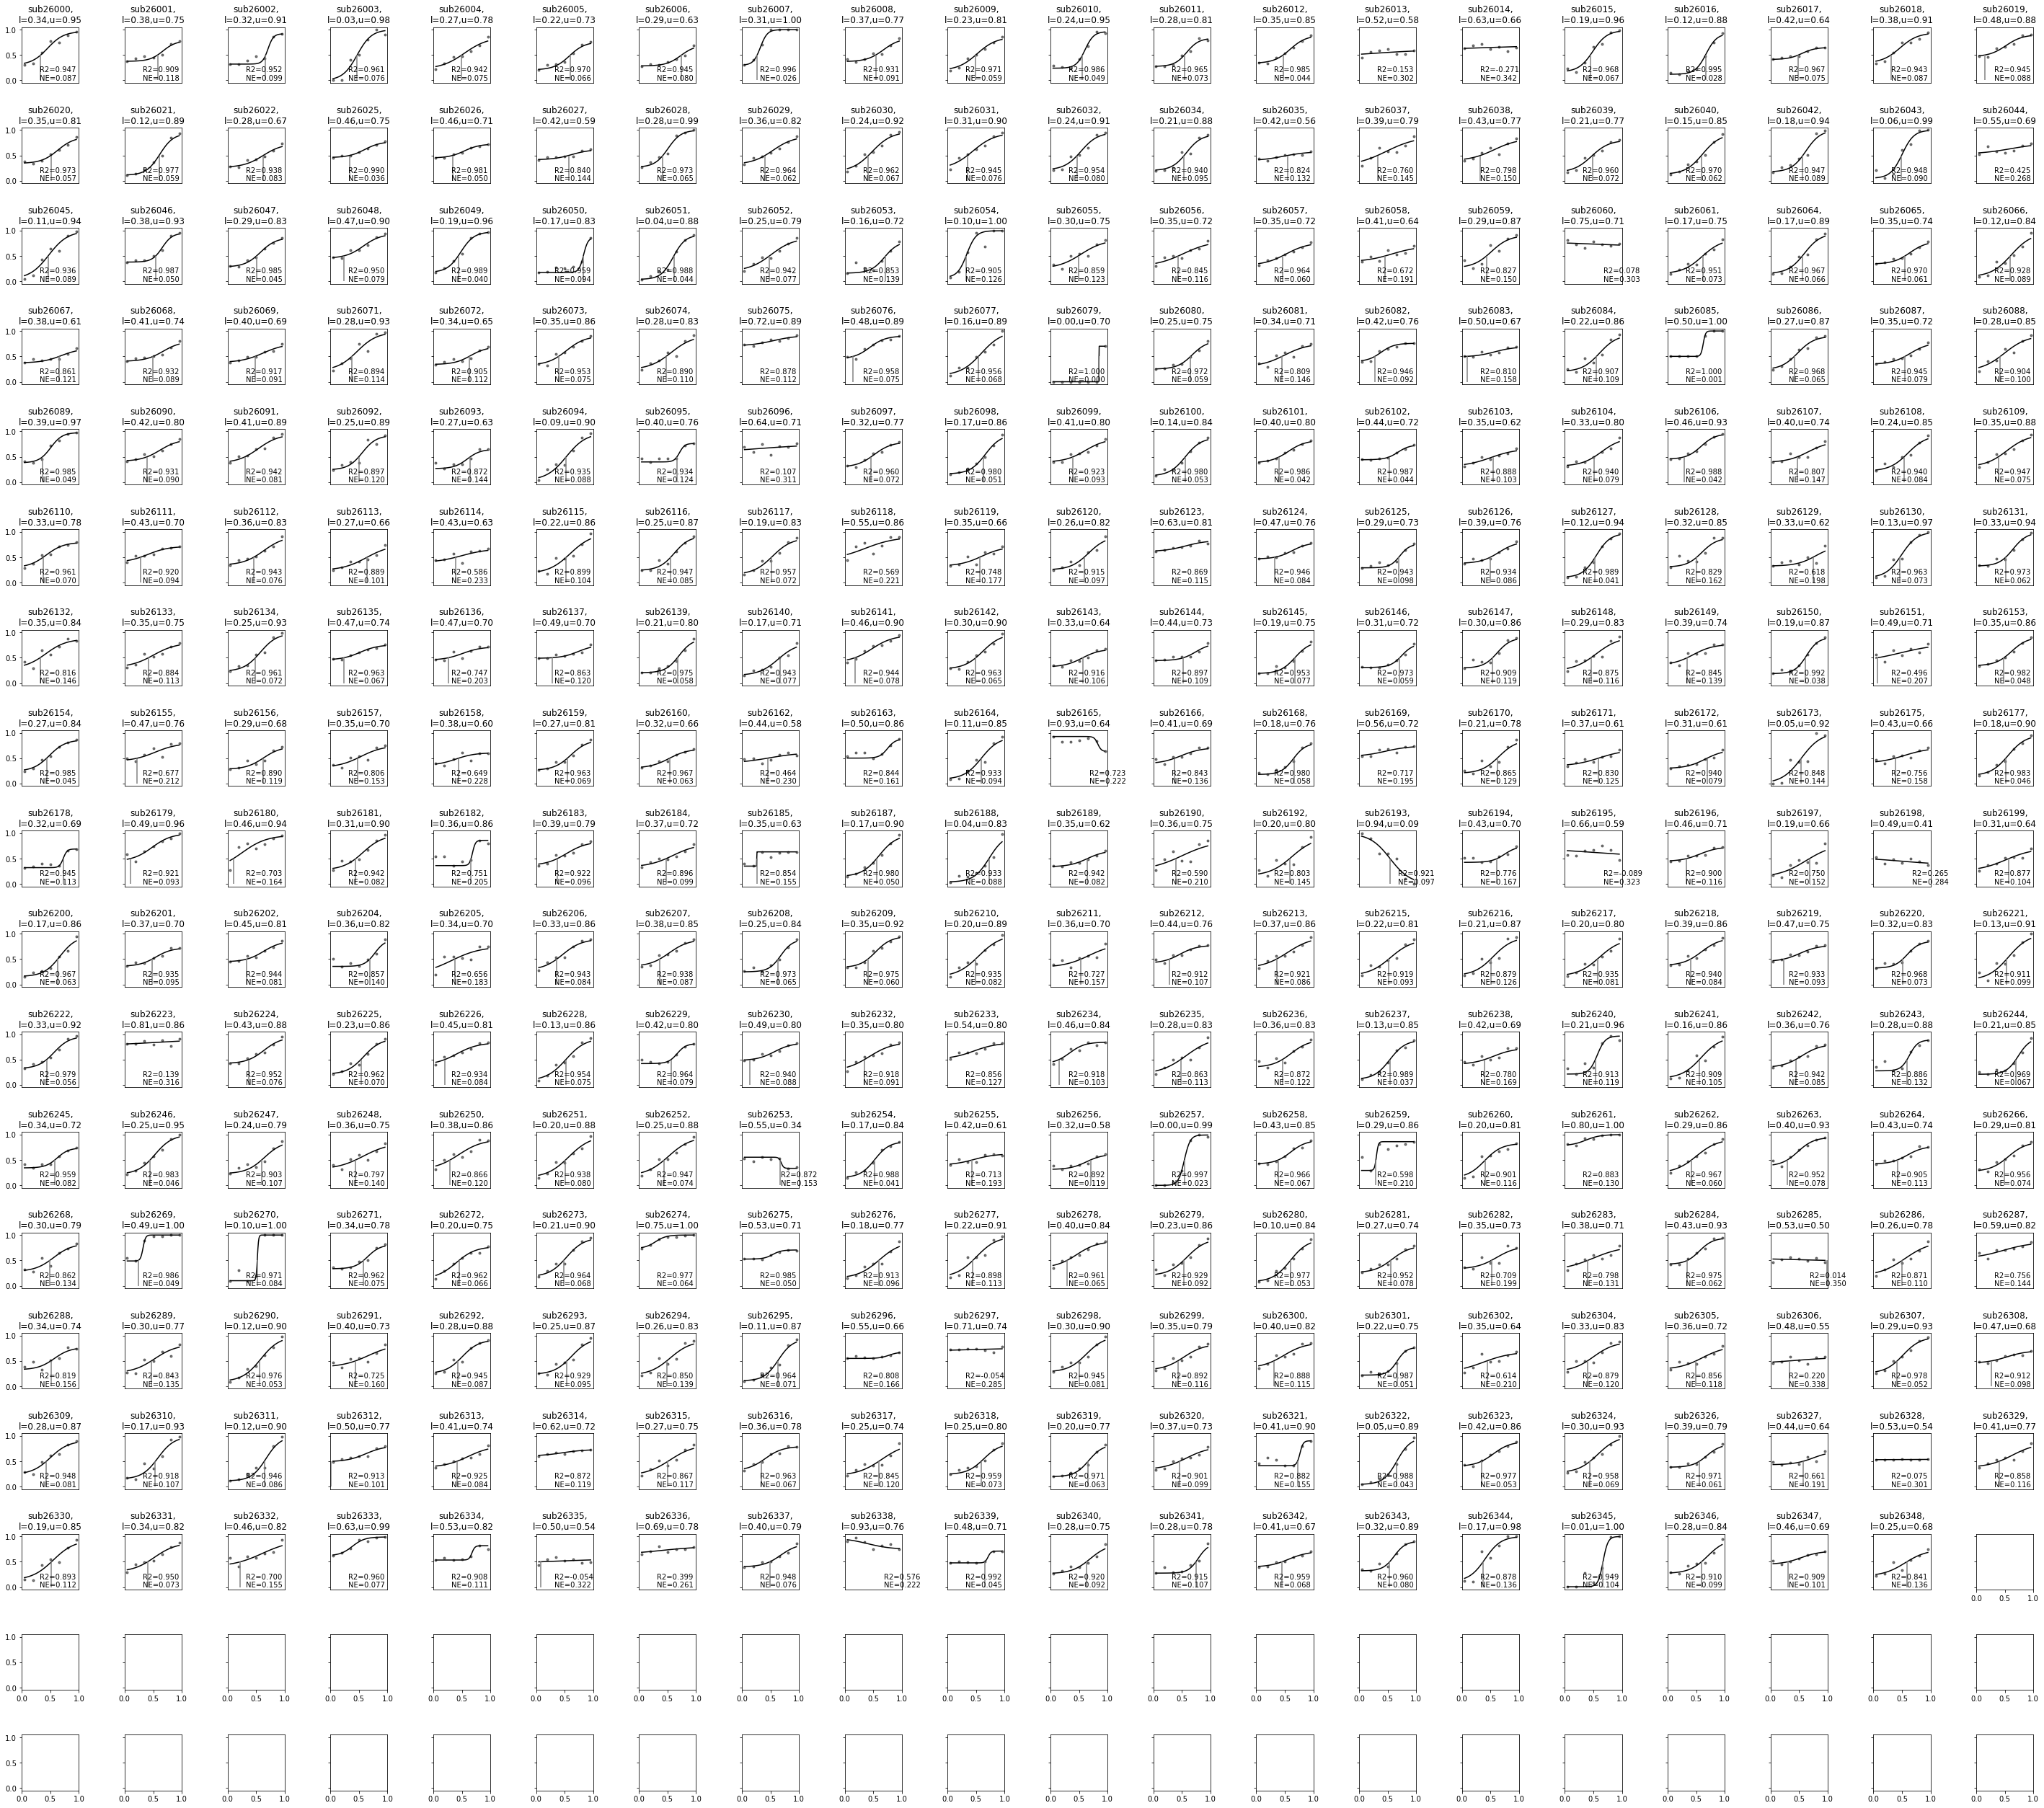

In [15]:
warnings.filterwarnings("ignore")

# nrow, ncol = 35, 10
# fig,axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20,70))
nrows = 18
ncols = 20
jitter_strength = .01
fig, axs  = plt.subplots(figsize = (50,45), nrows=nrows, ncols = ncols, sharey = True, sharex = False)
best_fit_params = []
subID = []
for isub,subID in enumerate(subs):
    df_params['subID'][isub] = subID #isub + 1
    if isub%50 == 0:
        print(isub, subID)
    ax = plt.subplot(nrows, ncols, isub+1)
    # stim_row = fig_save_loc['subID']==subID
    # r = fig_save_loc.loc[stim_row,'row'].values[0]
    # c = fig_save_loc.loc[stim_row,'column'].values[0]
    # ax = axs[r,c]

    xfit = 1-(df_mean.loc[df_mean['subID'] == subID, 'chargeSpeeds'].values - 1.5)/7.5 # inverse charge speed
    yfit = df_mean.loc[df_mean['subID'] == subID,'responses_play'].values/100 # playfulness

    x = np.array(xfit)
    y = np.array(yfit)

    flipped = False
    if y[x == 0] - y[x == 1] > .001: # flipped subs (curve shape opposite of that expected)
        flipped =  True
        x = np.flip(x)
        print('flipped', subID)

    # try:
    results = fit_sigmoid(x, y, rescale=True, padding=False, n_rep=nRep, param_bounds=param_bounds,
                param_details=f"{rootfile_data}/sub%d_1k.csv"%(subID))
    best_params, goodness_of_fit, other_params = results

    ss_res, df_params['nrmse'][isub], df_params['r_squared'][isub],df_params['aic'][isub] = goodness_of_fit
    if flipped == False:
        df_params['center'][isub], df_params['sigma'][isub], df_params['bias_lower'][isub], df_params['bias_upper'][isub] = best_params
        df_params['center_y'][isub], df_params['obj_center'][isub], df_params['bias_xmin'][isub], df_params['bias_xmax'][isub] = other_params
    else: # fightiness decreases with chargespeed (unexpected)
        # print('flipped')
        df_params['center'][isub], df_params['sigma'][isub], df_params['bias_upper'][isub], df_params['bias_lower'][isub] = best_params
        df_params['center_y'][isub], df_params['obj_center'][isub], df_params['bias_xmax'][isub], df_params['bias_xmin'][isub] = other_params
        df_params['bias_upper'][isub] = 1 - df_params['bias_upper'][isub]
        df_params['bias_lower'][isub] = 1 - df_params['bias_lower'][isub]
        df_params['bias_xmax'][isub] = 1 - df_params['bias_xmax'][isub]
        df_params['bias_xmin'][isub] = 1 - df_params['bias_xmin'][isub]
        # e.g. if the curve goes from .8 to .2, bias_xmin should be 0.8. flipped curve will give bias_xmax as 0.2 
        # (on the flipped version of the true curve) which when flipped (i.e., assigned to bias_xmin) and then subtracted from 1 gives us a bias_xmin of 0.8
    
    df_params['flipped'][isub] = flipped

    if np.isnan(df_params['obj_center'][isub]):
        if (df_params['bias_xmin'][isub] >= 0.5) & (df_params['bias_xmax'][isub] <= 0.5):
            obj_center = 0 if flipped == False else 1
        elif (df_params['bias_xmax'][isub] >= 0.5) & (df_params['bias_xmin'][isub] <= 0.5):
            obj_center = 1 if flipped == False else 0
    
    plot_curve_fit(ax, x, y, best_params, color='black', text_loc=(0.3, 0))

    ax.vlines(df_params['obj_center'][isub],0,.5,color='grey')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

    # ax.set_xticks(np.arange(0,1.1,.2))
    if flipped:
        ax.invert_xaxis()
        df_params['center_y'][isub] = 1-df_params['center_y'][isub] # do this ONLY AFTER plotting
        df_params['obj_center'][isub] = 1-df_params['obj_center'][isub]
    ax.set_title(f"sub{subID},\nl={df_params['bias_xmin'][isub]:.2f},u={1-df_params['bias_xmax'][isub]:.2f}")
    ax.set_xticks([])

    # if isub == 1:
    #     break

plt.subplots_adjust(wspace=0.8, hspace=0.8)
plt.savefig(f'../results/playfight/curvefit_play_ses{sesID}.png',dpi=300,bbox_inches='tight')

df_params[['subID', 'r_squared', 'nrmse', 'aic', 'center', 'obj_center', 'sigma', 'bias_xmin', 'bias_xmax', 'bias_lower', 'bias_upper','flipped']].to_csv(f'{rootfile_data}/all_params_1k_play.csv', index = False)

In [14]:
# df_params[['subID', 'r_squared', 'nrmse', 'center', 'obj_center', 'sigma', 'bias_xmin', 'bias_xmax', 'bias_lower', 'bias_upper']].to_csv('../data/curve_fit_rmse/all_params_1k.csv', index = False)
# df_params[['subID', 'r_squared', 'center', 'obj_center', 'sigma', 'bias_xmin', 'bias_xmax']].to_csv('../data/curve_fit_2params_mean/all_params_1k.csv', index = False)

In [12]:
df_params.sort_values(by=['r_squared']).head()

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax
178,26198.0,-0.513648,0.424820,0.671953,1.0,0.003,0.000,0.5015,0.665934,0.340046,0.417460
290,26317.0,-0.400278,0.403457,0.146622,1.0,0.029,0.744,0.1425,NaN,0.134194,0.811811
138,26154.0,-0.337424,0.345882,1.332020,1.0,0.073,0.632,0.2205,NaN,0.134604,0.803764
217,26242.0,-0.321875,0.381287,0.446003,1.0,0.468,0.369,0.5495,NaN,0.531621,0.428485
240,26265.0,-0.318933,0.432352,1.179761,1.0,0.446,0.335,0.5555,0.062800,0.497486,0.454315


In [12]:
df_params.sort_values(by=['r_squared'])

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax
178,26198.0,-0.513648,0.424820,0.671953,1.000000,0.003,0.000,0.5015,0.665935,3.400456e-01,0.417460
290,26317.0,-0.400278,0.403457,0.146622,1.000000,0.029,0.744,0.1425,1.000000,1.341941e-01,0.811811
138,26154.0,-0.337424,0.345882,1.332020,1.000000,0.073,0.632,0.2205,1.000000,1.346035e-01,0.803764
217,26242.0,-0.321875,0.381287,0.446003,1.000000,0.468,0.369,0.5495,0.000000,5.316208e-01,0.428485
240,26265.0,-0.318933,0.432352,1.179761,1.000000,0.446,0.335,0.5555,0.062800,4.974858e-01,0.454316
...,...,...,...,...,...,...,...,...,...,...,...
24,26026.0,0.995283,0.028122,0.308653,0.104647,0.075,0.120,0.4775,0.320365,1.150578e-01,0.121087
10,26012.0,0.996383,0.025897,0.692898,0.067694,0.000,0.300,0.3500,0.754926,2.510406e-05,0.307417
234,26259.0,0.997195,0.023158,0.452252,0.057435,0.008,0.000,0.5040,0.451326,8.377272e-03,0.000072
75,26085.0,0.999992,0.001460,0.363988,0.022314,0.000,0.500,0.2500,1.000000,4.118124e-08,0.500000


In [13]:
df_params.loc[df_params['r_squared']<0,:]

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax
4,26005.0,-0.271219,0.342287,0.551178,1.0,0.285,0.578000,0.353500,1.000000,0.335086,0.631381
51,26059.0,-0.213889,0.347389,0.526816,1.0,0.190,0.655000,0.267500,1.000000,0.247545,0.714499
138,26154.0,-0.337424,0.345882,1.332020,1.0,0.073,0.632000,0.220500,1.000000,0.134604,0.803764
169,26189.0,-0.044954,0.316153,0.602975,1.0,0.245,0.476000,0.384500,1.000000,0.343672,0.588166
178,26198.0,-0.513648,0.424820,0.671953,1.0,0.003,0.000000,0.501500,0.665935,0.340046,0.417460
217,26242.0,-0.321875,0.381287,0.446003,1.0,0.468,0.369000,0.549500,0.000000,0.531621,0.428485
223,26248.0,-0.054295,0.284692,0.629077,1.0,0.225,0.666250,0.279375,1.000000,0.262815,0.710655
240,26265.0,-0.318933,0.432352,1.179761,1.0,0.446,0.335000,0.555500,0.062800,0.497486,0.454316
270,26296.0,-0.123804,0.373582,0.475171,1.0,0.432,0.461111,0.485444,1.000000,0.472980,0.500844
290,26317.0,-0.400278,0.403457,0.146622,1.0,0.029,0.744000,0.142500,1.000000,0.134194,0.811811


In [11]:
df_corr = df_params[['r_squared','sigma','center','obj_center','bias_xmax','bias_xmin']].corr()
df_corr

,r_squared,sigma,center,obj_center,bias_xmax,bias_xmin
r_squared,1.000000,-0.932076,-0.351176,-0.344049,-0.496990,-0.425394
sigma,-0.932076,1.000000,0.372900,0.349787,0.446517,0.390681
center,-0.351176,0.372900,1.000000,0.491963,0.273130,-0.044330
obj_center,-0.344049,0.349787,0.491963,1.000000,0.726148,-0.072470
bias_xmax,-0.496990,0.446517,0.273130,0.726148,1.000000,0.300418
bias_xmin,-0.425394,0.390681,-0.044330,-0.072470,0.300418,1.000000


In [23]:
import seaborn as sns

Text(0.5, 1.0, 'with bad fits too!')

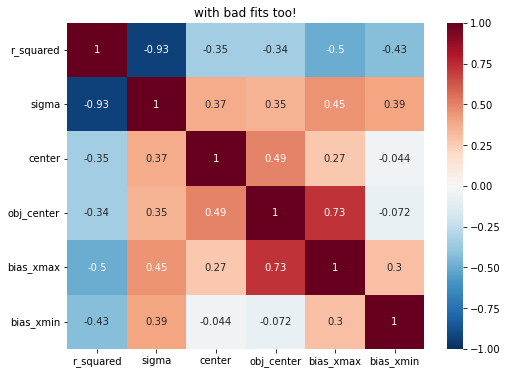

In [24]:
plt.figure(figsize = (8,6))
sns.heatmap(df_corr,cmap='RdBu_r',vmin=-1,vmax=1,annot=True)
plt.yticks(rotation = 0)
plt.title('with bad fits too!')

<AxesSubplot:xlabel='sigma', ylabel='r_squared'>

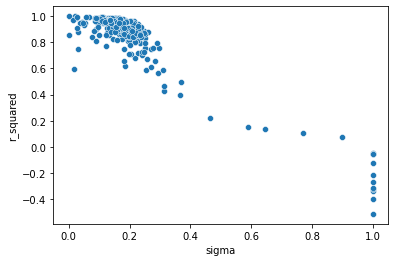

In [25]:
sns.scatterplot(data = df_params,x = 'sigma', y ='r_squared')

In [26]:
df_clean = df_params.loc[df_params['r_squared']>=.8,:]
df_clean.shape

(269, 11)

In [27]:
df_clean.loc[np.isinf(df_clean['obj_center']),:]

,subID,r_squared,nrmse,center,sigma,bias_lower,bias_upper,center_y,obj_center,bias_xmin,bias_xmax


In [28]:
obj_center = []
for i,row in df_clean.iterrows():
    if np.isinf(row['obj_center']):
        if np.round(row['bias_xmax'],4) <= .5:
            obj_center.append(1)
        elif np.round(row['bias_xmin'],4) >= .5:
            obj_center.append(0)
    else:
        obj_center.append(row['obj_center'])
df_clean['obj_center'] = obj_center

In [29]:
df_clean = df_clean.loc[~np.isinf(df_clean['obj_center']),:]
df_clean.shape

(269, 11)

In [30]:
df_corr = df_clean[['r_squared','sigma','center','obj_center','bias_xmax','bias_xmin']].corr()
df_corr

,r_squared,sigma,center,obj_center,bias_xmax,bias_xmin
r_squared,1.000000,-0.400929,-0.017754,-0.121227,-0.215882,-0.375940
sigma,-0.400929,1.000000,0.263532,0.138017,0.066750,0.255132
center,-0.017754,0.263532,1.000000,0.613086,0.179023,-0.239330
obj_center,-0.121227,0.138017,0.613086,1.000000,0.695785,-0.193919
bias_xmax,-0.215882,0.066750,0.179023,0.695785,1.000000,0.241933
bias_xmin,-0.375940,0.255132,-0.239330,-0.193919,0.241933,1.000000


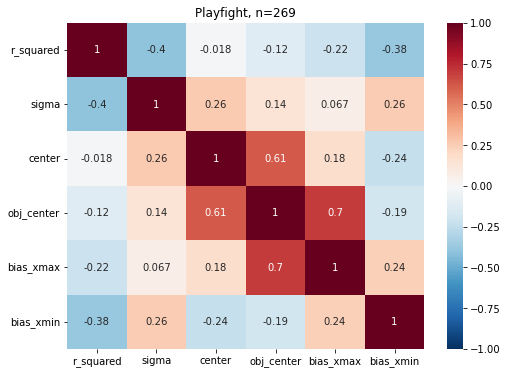

In [31]:
plt.figure(figsize = (8,6))
sns.heatmap(df_corr,cmap='RdBu_r',vmin=-1,vmax=1,annot=True)
plt.title(f'Playfight, n={df_clean.shape[0]}')
plt.yticks(rotation = 0)
plt.savefig('../results/covariance_matrix_curvefit.png')

<AxesSubplot:xlabel='sigma', ylabel='r_squared'>

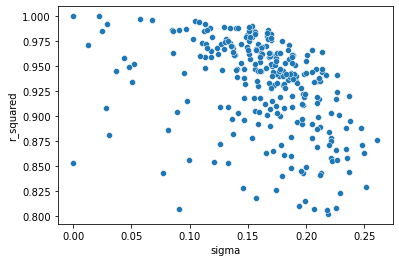

In [32]:
sns.scatterplot(data = df_clean,x = 'sigma', y ='r_squared')

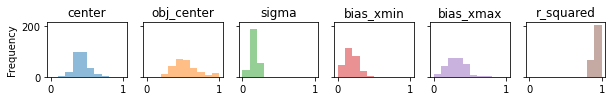

In [33]:
plot_curve_param = ['center', 'obj_center', 'sigma', 'bias_xmin', 'bias_xmax', 'r_squared']
df_clean[plot_curve_param].plot(kind='hist', bins=10, subplots=True, sharex=False, sharey=True, layout=(1,len(plot_curve_param)), legend=False, title=plot_curve_param, figsize=(10,1), alpha=0.5)
plt.savefig('../results/curvefit_histograms.png', bbox_inches="tight" )

In [36]:
from scipy import stats

0.24193314418091127 6.091446676500081e-05


Text(0.1, 0.9, 'r=0.24 (p < .001)')

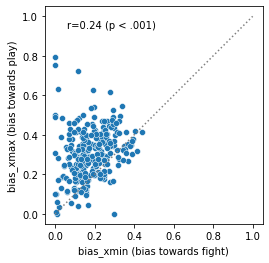

In [38]:
sns.scatterplot(data = df_clean, x = 'bias_xmin',y = 'bias_xmax')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0,1],[0,1], color ='grey',ls = ':')
plt.xlabel('bias_xmin (bias towards fight)')
plt.ylabel('bias_xmax (bias towards play)')
r,p = stats.pearsonr(df_clean['bias_xmin'], df_clean['bias_xmax'])
print(r,p)
plt.gca().annotate(f'r={r:.2f} (p < .001)',xy = (0.1,.9),xycoords = 'axes fraction')

<AxesSubplot:>

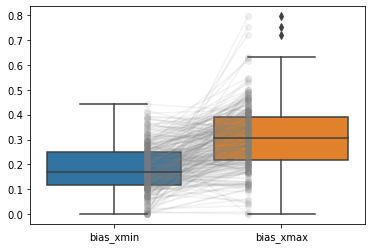

In [39]:
for _, row in df_clean.iterrows():
    plt.plot([0.2, .8], [row['bias_xmin'], row['bias_xmax']], '-o', color='grey', alpha = .1)
sns.boxplot(data = df_clean[['bias_xmin','bias_xmax']])

In [40]:
from scipy import stats

In [41]:
(df_clean['bias_xmax'] - df_clean['bias_xmin']).mean()

0.12606897272032674

In [42]:
stats.ttest_rel(df_clean['bias_xmin'],df_clean['bias_xmax'])

Ttest_relResult(statistic=-14.793591646302325, pvalue=1.312835566271599e-36)

In [43]:
df_clean['center'].describe()

count    269.000000
mean       0.419375
std        0.104761
min        0.000100
25%        0.355657
50%        0.416549
75%        0.479684
max        0.772257
Name: center, dtype: float64

In [44]:
from pymer4.models import Lmer,Lm
from pymer4.stats import vif

In [45]:
def vif_info(model):
    design_matrix_df = model.design_matrix
    #design_matrix_df.shape
    # print('model:', model.formula)
    vif_keys= list(vif(design_matrix_df)[1].keys())
    vif_values= list(vif(design_matrix_df)[1].values())
    print('VIF: ',','.join([vif_keys[i] + ': ' + str(np.round(vif_values[i],2)) for i in range(len(vif_keys))]))
    # print('AIC: ', model.AIC)

In [46]:
model = Lm('subID ~ center + sigma  + bias_xmin  + bias_xmax' , data=df_params) # ff: anglesm rfx: subject ID
model.fit(summary=False)
vif_info(model)

VIF:  center: 1.26,sigma: 1.57,bias_xmin: 1.29,bias_xmax: 1.32


In [47]:
rows = ~np.isnan(df_params['obj_center']) & ~np.isinf(df_params['obj_center'])
model = Lm('subID ~ center + sigma  + bias_xmin  + bias_xmax' , data=df_params.loc[rows,:]) # ff: anglesm rfx: subject ID
model.fit(summary=False)
vif_info(model)

VIF:  center: 1.26,sigma: 1.57,bias_xmin: 1.29,bias_xmax: 1.32


In [48]:
rows = ~np.isnan(df_params['obj_center']) & ~np.isinf(df_params['obj_center'])
model = Lm('subID ~ obj_center + sigma  + bias_xmin  + bias_xmax' , data=df_params.loc[rows,:]) # ff: anglesm rfx: subject ID
model.fit(summary=False)
vif_info(model)

VIF:  obj_center: 2.74,sigma: 1.43,bias_xmin: 1.56,bias_xmax: 2.9


In [ ]:
X

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cf_params_1 = ["sigma","center", "bias_xmax", "bias_xmin"]
X = df_params[cf_params_1]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = X.reset_index()
# X.drop(columns=['index'],inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0      index   3.526623
1      sigma   5.310976
2     center   9.753847
3  bias_xmax  10.472256
4  bias_xmin   6.942190


In [111]:
X.drop(columns=['index'],inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0      sigma   5.310876
1     center   8.778918
2  bias_xmax  10.376944
3  bias_xmin   6.817238


In [124]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [112]:
from pymer4.stats import vif
vif(X,has_intercept=False)

({},
 {'sigma': 1.761860767424135,
  'center': 1.4481021328207617,
  'bias_xmax': 1.3359210419614593,
  'bias_xmin': 1.6410180332850042})

In [73]:
cf_params_1 = ["sigma","obj_center", "bias_xmax", "bias_xmin"]
X = df_params[cf_params_1]
X = X.replace([np.inf, -np.inf], np.nan).dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0       sigma   6.056342
1  obj_center  12.386012
2   bias_xmax  16.796136
3   bias_xmin   8.257309


In [76]:
X.columns

Index(['sigma', 'obj_center', 'bias_xmax', 'bias_xmin'], dtype='object')

In [75]:
i = X.columns[0]
i

'sigma'

In [78]:
X.values.shape

(289, 4)

In [96]:
# Assuming X is your design matrix
if isinstance(X, pd.DataFrame):
    features = X.columns
else:
    features = range(X.shape[1])

VIFs = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

for feature, vif in zip(features, VIFs):
    print(f"VIF for {feature}: {vif}")


VIF for sigma: 5.310876132164404
VIF for center: 8.778917662271116
VIF for bias_xmax: 10.376943546437964
VIF for bias_xmin: 6.817237590004739


In [84]:
# from pymer4.stats import vif

# vif(X,has_intercept=False)

({},
 {'sigma': 1.8406606114996829,
  'obj_center': 2.199136287843744,
  'bias_xmax': 2.075913409051268,
  'bias_xmin': 2.0052263572275923})

In [83]:

# vif(X,has_intercept=False, exclude_intercept=False)

({},
 {'sigma': 1.8406606114996829,
  'obj_center': 2.199136287843744,
  'bias_xmax': 2.075913409051268,
  'bias_xmin': 2.0052263572275923})

In [87]:

# vif(X,has_intercept=False, exclude_intercept=True)

({},
 {'sigma': 1.8406606114996829,
  'obj_center': 2.199136287843744,
  'bias_xmax': 2.075913409051268,
  'bias_xmin': 2.0052263572275923})